In [ ]:
# Body Performance Data - https://www.kaggle.com/datasets/kukuroo3/body-performance-data

# Data Analysis - Body Performance Dataset

## Dataset loading and exploration

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bodyPerformance.csv')

In [ ]:
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [ ]:
df.isna().any()

age                        False
gender                     False
height_cm                  False
weight_kg                  False
body fat_%                 False
diastolic                  False
systolic                   False
gripForce                  False
sit and bend forward_cm    False
sit-ups counts             False
broad jump_cm              False
class                      False
dtype: bool

In [ ]:
y_train = df.pop('class')

In [ ]:
X_train = df

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 10)

In [ ]:
y_train.value_counts()

A    2695
D    2686
B    2668
C    2665
Name: class, dtype: int64

In [ ]:
X_train.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000,10714.000000
mean,36.835262,168.551129,67.431598,23.257021,78.806524,130.278318,36.961638,15.232523,39.828355,190.223175
std,13.673850,8.422532,11.898575,7.246073,10.696729,14.647548,10.607877,8.532218,14.291281,39.839621
min,21.000000,125.000000,31.900000,3.000000,6.000000,14.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.300000,18.057662,71.000000,120.000000,27.500000,10.900000,30.000000,163.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,42.000000,193.000000
75%,48.000000,174.700000,75.300000,28.000000,86.000000,141.000000,45.100000,20.800000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


### Making categorical 'gender' variable into a numerical one

In [ ]:
X_train['gender'] = X_train['gender'].replace({'M': 0, 'F': 1})
X_test['gender'] = X_test['gender'].replace({'M': 0, 'F': 1})

### Removing an outlier from dataset

In [ ]:
X_test = X_test[X_test['diastolic'] != 0]

In [ ]:
y_test = y_test[X_test.index]

In [ ]:
X_train.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
766,58.0,0,177.4,73.2,15.8,72.0,144.0,20.5,17.9,36.0,194.0
8249,54.0,0,167.1,61.1,19.9,60.0,113.0,33.8,-6.8,20.0,168.0
9876,41.0,1,160.7,67.6,39.9,95.0,132.0,22.6,21.8,0.0,82.0
2588,48.0,1,161.8,55.1,17.2,67.0,127.0,31.2,23.4,51.0,181.0
9731,29.0,1,165.4,64.0,37.5,81.0,117.0,22.7,7.8,19.0,125.0


In [ ]:
X_train['gender'].value_counts()

0    6794
1    3920
Name: gender, dtype: int64

### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled_features, columns=X_train.columns)
X_train_scaled

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,1.547898,-0.759592,1.050668,0.484820,-1.029160,-0.636348,0.936834,-1.551904,0.312650,-0.267893,0.094805
1,1.255355,-0.759592,-0.172299,-0.532156,-0.463310,-1.758239,-1.179660,-0.298060,-2.582394,-1.387509,-0.557842
2,0.304591,1.316497,-0.932201,0.014154,2.296935,1.513942,0.117546,-1.353929,0.769763,-2.787029,-2.716598
3,0.816541,1.316497,-0.801593,-1.036441,-0.835943,-1.103802,-0.223824,-0.543173,0.957296,0.781747,-0.231518
4,-0.573037,1.316497,-0.374148,-0.288418,1.965705,0.205070,-0.906564,-1.344501,-0.871153,-1.457485,-1.637220
...,...,...,...,...,...,...,...,...,...,...,...
10709,-0.426766,1.316497,-0.884707,-1.280179,0.364763,-2.038711,-1.589304,-0.995688,0.441580,-0.267893,-0.658249
10710,-0.865580,1.316497,-0.219793,-0.750679,1.110030,-0.823330,-0.565194,-0.825994,0.230605,-0.057965,-0.708453
10711,-1.084987,-0.759592,1.074415,0.425987,-0.449509,-0.168894,0.936834,0.390140,-0.214787,0.921699,0.872961
10712,0.889677,-0.759592,-0.053565,-0.280013,-0.601322,1.046488,1.824396,0.314721,0.195442,0.081987,0.195212


In [ ]:
scaled_features = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(scaled_features, columns=X_test.columns)
X_test_scaled

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,-0.061087,-0.759592,0.053297,0.804201,0.930614,0.111579,-0.701742,-0.250923,-1.164174,-0.267893,-0.030704
1,0.889677,-0.759592,-0.267287,2.520453,3.332026,0.952997,0.595464,-0.184931,-3.754477,-1.527461,-0.934369
2,-1.158123,-0.759592,0.813198,-0.110237,-0.960154,0.392052,-1.111386,0.474986,0.394696,1.341555,0.596841
3,-1.084987,1.316497,-0.184173,-1.792870,-0.159683,-1.197293,-0.906564,-2.145830,-4.000615,-1.667413,-1.687423
4,1.913577,1.316497,-0.742226,-0.708656,0.240552,-0.262384,0.254094,-1.910145,1.426129,-2.157245,-1.712525
...,...,...,...,...,...,...,...,...,...,...,...
2673,-0.061087,-0.759592,0.100790,-0.078299,-0.863545,-1.571257,-0.838290,0.229874,-0.566412,0.431867,-0.206417
2674,1.621034,-0.759592,-0.967822,-0.288418,0.157745,1.326961,1.619574,-0.307488,-0.015533,-1.317533,0.672147
2675,-0.353630,1.316497,-0.967822,-1.607965,1.220439,0.111579,0.185820,-1.052252,1.285479,-0.617773,-1.285795
2676,-1.084987,1.316497,-0.754099,-1.994584,-0.408105,0.018088,-1.179660,-1.504767,0.066513,-0.057965,-0.557842


### Changing result dataset to numerical data

In [ ]:
y_train = y_train.replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})
y_test = y_test.replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})

In [ ]:
y_train.value_counts()

1    2695
4    2686
2    2668
3    2665
Name: class, dtype: int64

### Correlation Matrix for dataset

In [ ]:
import seaborn as sns

corr_matrix = X_train.corr()
corr_matrix.style.background_gradient(axis=None, cmap='coolwarm')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,0.058399,-0.294868,-0.102746,0.241843,0.161836,0.210350,-0.182614,-0.072758,-0.544002,-0.440137
gender,0.058399,1.000000,-0.727518,-0.674573,0.552309,-0.224845,-0.319378,-0.799045,0.324339,-0.471425,-0.700974
height_cm,-0.294868,-0.727518,1.000000,0.736443,-0.515188,0.138474,0.203635,0.734467,-0.220374,0.497596,0.672144
weight_kg,-0.102746,-0.674573,0.736443,1.000000,-0.087987,0.255969,0.331962,0.702075,-0.295118,0.296744,0.478288
body fat_%,0.241843,0.552309,-0.515188,-0.087987,1.000000,0.047093,-0.031015,-0.544658,-0.072720,-0.608482,-0.677263
diastolic,0.161836,-0.224845,0.138474,0.255969,0.047093,1.000000,0.670681,0.198602,-0.064222,0.012992,0.091102
systolic,0.210350,-0.319378,0.203635,0.331962,-0.031015,0.670681,1.000000,0.279248,-0.083319,0.055873,0.145280
gripForce,-0.182614,-0.799045,0.734467,0.702075,-0.544658,0.198602,0.279248,1.000000,-0.114354,0.577034,0.743373
sit and bend forward_cm,-0.072758,0.324339,-0.220374,-0.295118,-0.072720,-0.064222,-0.083319,-0.114354,1.000000,0.176430,0.028254
sit-ups counts,-0.544002,-0.471425,0.497596,0.296744,-0.608482,0.012992,0.055873,0.577034,0.176430,1.000000,0.748276


### GridSearch to define the most optimal hyperparameters for the models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

grid = {'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15, 20],
            'max_features': [3, 5, 7, 11]}

dtc_cv = GridSearchCV(
                    verbose=2,
                    estimator=tree.DecisionTreeClassifier(random_state=10),
                    param_grid=grid,
                    cv=5,
                     )

rfc_cv = GridSearchCV(
                    verbose=2,
                    estimator=RandomForestClassifier(random_state=10),
                    param_grid=grid,
                    cv=5,
                     )

dtc_cv.fit(X_train, y_train)
rfc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=5; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, max_features=7; total time=   0.0s
[CV] END ........criterion=gini, max_depth=5, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11]},
             verbose=2)

In [ ]:
dtc_cv.best_estimator_
df_tree = pd.DataFrame(dtc_cv.cv_results_)
rfc_cv.best_score_
df_forest = pd.DataFrame(rfc_cv.cv_results_)

In [ ]:
df_tree['classifier'] = 'decision_tree'
df_forest['classifier'] = 'random_forest'

In [ ]:
df_classifiers = pd.concat([df_tree, df_forest], ignore_index=True)

In [ ]:
scores_df = df_classifiers[['classifier', 'param_criterion', 'param_max_depth', 'param_max_features', 'mean_test_score']]

In [ ]:
scores_df_gini = scores_df[scores_df['param_criterion'] == 'gini']
scores_df_entropy = scores_df[scores_df['param_criterion'] == 'entropy']
scores_df_gini.T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
classifier,decision_tree,decision_tree,decision_tree,decision_tree,decision_tree,decision_tree,decision_tree,decision_tree,decision_tree,decision_tree,...,random_forest,random_forest,random_forest,random_forest,random_forest,random_forest,random_forest,random_forest,random_forest,random_forest
param_criterion,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini,...,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini
param_max_depth,5,5,5,5,10,10,10,10,15,15,...,10,10,15,15,15,15,20,20,20,20
param_max_features,3,5,7,11,3,5,7,11,3,5,...,7,11,3,5,7,11,3,5,7,11
mean_test_score,0.504947,0.52903,0.568413,0.590163,0.595299,0.629736,0.660631,0.668284,0.60052,0.626097,...,0.727645,0.728859,0.727832,0.732593,0.740153,0.73698,0.728206,0.738006,0.73502,0.734367


### Pivot Table to display scores for the ML models

In [ ]:
pivot_scores_df = scores_df.pivot(index=['classifier', 'param_criterion', 'param_max_depth'], columns='param_max_features', values='mean_test_score')
pivot_scores_df.style.background_gradient(axis=None, cmap='coolwarm')

### Scatterplot for hyperparameters results - ML Models

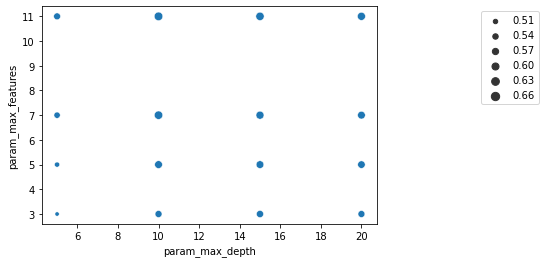

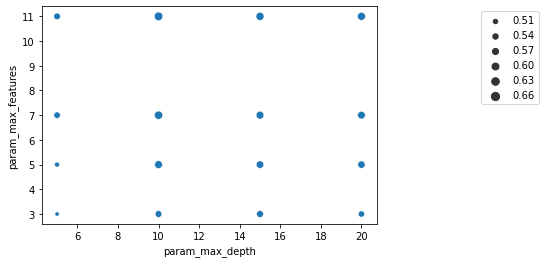

In [ ]:
import matplotlib.pyplot as plt

sns.scatterplot(data=df_tree[df_tree['param_criterion'] == 'gini'], x='param_max_depth', y='param_max_features', size='mean_test_score')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()
sns.scatterplot(data=df_tree[df_tree['param_criterion'] == 'entropy'], x='param_max_depth', y='param_max_features', size='mean_test_score')
# plt.text(10, 3, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()
# for i, txt in enumerate(df_tree['mean_test_score']):
#     plt.annotate(txt, (5, 4))

### Defining Neural Network

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

def create_model():
    classifier = Sequential()

    classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu', input_dim = 11))

    classifier.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))

    classifier.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))

    classifier.add(Dense(units=65, kernel_initializer='he_uniform', activation='relu'))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(units=80, kernel_initializer='he_uniform', activation='relu'))
    classifier.add(Dropout(0.2))

    classifier.add(Dense(units=55, kernel_initializer='he_uniform', activation='relu'))
    
    classifier.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))

    classifier.add(Dense(units=4, activation='softmax'))  # kernel_initializer='glorot_uniform', 

    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

In [ ]:
y_nn_train = pd.get_dummies(y_train)

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 35)                735       
                                                                 
 dense_2 (Dense)             (None, 50)                1800      
                                                                 
 dense_3 (Dense)             (None, 65)                3315      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_4 (Dense)             (None, 80)                5280      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0

In [ ]:
#model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.Accuracy()])
history = model.fit(X_train, y_nn_train, epochs = 200, batch_size = 16, validation_split=0.2)

Epoch 1/200
536/536 [==============================] - 3s 4ms/step - loss: 7.1752 - accuracy: 0.3028 - val_loss: 1.1551 - val_accuracy: 0.4517
Epoch 2/200
536/536 [==============================] - 2s 3ms/step - loss: 1.2387 - accuracy: 0.4179 - val_loss: 1.0706 - val_accuracy: 0.4946
Epoch 3/200
536/536 [==============================] - 2s 3ms/step - loss: 1.1056 - accuracy: 0.4697 - val_loss: 1.0014 - val_accuracy: 0.5390
Epoch 4/200
536/536 [==============================] - 2s 3ms/step - loss: 1.0420 - accuracy: 0.5152 - val_loss: 1.0439 - val_accuracy: 0.5259
Epoch 5/200
536/536 [==============================] - 2s 3ms/step - loss: 1.0131 - accuracy: 0.5316 - val_loss: 0.9663 - val_accuracy: 0.5506
Epoch 6/200
536/536 [==============================] - 2s 3ms/step - loss: 0.9899 - accuracy: 0.5445 - val_loss: 0.9322 - val_accuracy: 0.5786
Epoch 7/200
536/536 [==============================] - 1s 3ms/step - loss: 0.9582 - accuracy: 0.5629 - val_loss: 0.9853 - val_accuracy: 0.5413

### Model Accuracy Plot

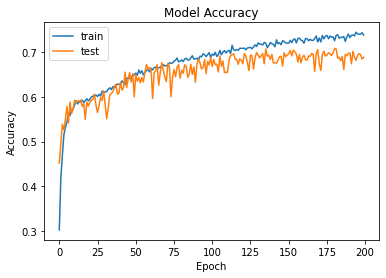

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model Loss Plot

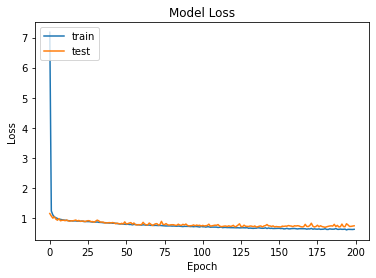

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Neural Network data preparation

In [ ]:
y_test_dummy = pd.get_dummies(y_test)
y_train_dummy = pd.get_dummies(y_train)

In [ ]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_nn_train.shape)
print("y_test:", y_test_dummy.shape)

X_train: (10714, 11)
X_test: (2678, 11)
y_train: (10714, 4)
y_test: (2678, 4)


In [ ]:
score = model.evaluate(X_test, y_test_dummy)

84/84 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6964


In [ ]:
y_test_np = y_test_dummy.to_numpy()

In [ ]:
y_pred_nn = model.predict(pd.get_dummies(X_test))
y_pred_nn

array([[1.4709889e-19, 3.5885460e-06, 1.6503835e-03, 9.9834597e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [2.9471698e-01, 5.4870957e-01, 1.3918073e-01, 1.7392635e-02],
       ...,
       [8.6282097e-02, 6.0450941e-01, 2.7109531e-01, 3.8113154e-02],
       [2.0873318e-03, 6.9794786e-01, 2.8417110e-01, 1.5793689e-02],
       [7.4847418e-01, 1.8093209e-01, 6.1275348e-02, 9.3184300e-03]],
      dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report
import numpy as np

In [ ]:
y_pred_nn = np.argmax(y_pred_nn, axis=1)
y_test_np = np.argmax(y_test_np, axis=1)

In [ ]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)

print(accuracy_score(y_test, y_pred_bool))

0.0870052277819268


### Model Performance Evaluation

In [ ]:
def model_performance(model, x_test, y_test):
    y_test_proba = pd.get_dummies(y_test)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)
    M = confusion_matrix(y_test, y_pred)
    #tn, fp, fn, tp = M.ravel() 
    plot_confusion_matrix(model, x_test, y_test)
    plt.show()
    print(f"{model.estimator}'s accuracy score: {accuracy_score(y_test, y_pred)} \nROC AUC score: {roc_auc_score(y_test_proba, y_pred_proba)}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


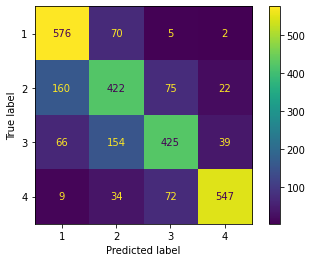

RandomForestClassifier(random_state=10)'s accuracy score: 0.7356235997012696 
ROC AUC score: 0.9183619429630736


In [ ]:
model_performance(rfc_cv, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


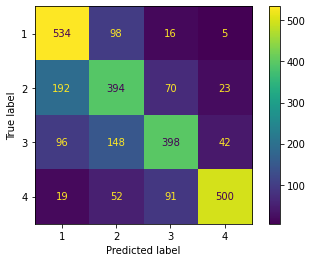

DecisionTreeClassifier(random_state=10)'s accuracy score: 0.6818521284540702 
ROC AUC score: 0.8557229574331247


In [ ]:
model_performance(dtc_cv, X_test, y_test)

In [67]:
y_test_proba = pd.get_dummies(y_test)
y_pred_proba = model.predict(X_test)
y_pred_proba

array([[1.4709889e-19, 3.5885460e-06, 1.6503835e-03, 9.9834597e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [2.9471698e-01, 5.4870957e-01, 1.3918073e-01, 1.7392635e-02],
       ...,
       [8.6282097e-02, 6.0450941e-01, 2.7109531e-01, 3.8113154e-02],
       [2.0873318e-03, 6.9794786e-01, 2.8417110e-01, 1.5793689e-02],
       [7.4847418e-01, 1.8093209e-01, 6.1275348e-02, 9.3184300e-03]],
      dtype=float32)

Neural Network accuracy score: 0.6964152352501867
Neural Network ROC AUC score: 0.8968862183151303


Text(0.5, 1.0, 'Confusion Matrix')

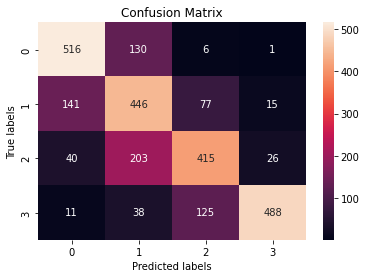

In [68]:
print(f'Neural Network accuracy score: {accuracy_score(y_pred_nn, y_test_np)}')
print(f'Neural Network ROC AUC score: {roc_auc_score(y_test_proba, y_pred_proba)}')
cm = confusion_matrix(y_test_np, y_pred_nn)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')